In [26]:
import os
import random
import keras as krs
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, Input, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
#from keras.applications.resnet50 import preprocess_input as res_preprocess_input
#from keras.applications.resnet50 import decode_predictions as res_decode_predictions
from keras.applications import resnet50
from keras.models import Sequential
import numpy as np
from keras.models import Model
from keras import optimizers
import matplotlib.pyplot as plt
from keras.optimizers import SGD

In [2]:
train_imagegen = ImageDataGenerator(rescale=1./255, 
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_imagegen = ImageDataGenerator(rescale=1./255)

train_generator = train_imagegen.flow_from_directory("train", 
                                                     target_size=(224,224),
                                                     batch_size=32, 
                                                     class_mode="categorical")


validation_generator = test_imagegen.flow_from_directory("validation",
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        class_mode="categorical")

test_generator = test_imagegen.flow_from_directory("test",
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 19506 images belonging to 2 classes.
Found 4860 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


##### 获取VGG16的基本参数

In [3]:
vgg16_model = applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

#### 获取ResNet50的基本参数

In [4]:
res50_model = applications.resnet50.ResNet50(weights='imagenet')

#### 显示一张图片

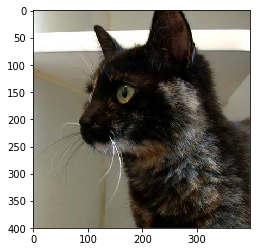

In [5]:
image_path="test/5.jpg"
img = load_img(image_path)
x = image.img_to_array(img)

plt.imshow(img)
plt.show()

##### 用已经训练好的模型进行预测

In [6]:
image_path="test/5.jpg"
img = load_img(image_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = vgg16_model.predict(x)
print('Vgg16 Predicted:', decode_predictions(features, top=3)[0])


features = res50_model.predict(x)
print('Res50 Predicted:', decode_predictions(features, top=3)[0])


Vgg16 Predicted: [('n02123045', 'tabby', 0.1955141), ('n04493381', 'tub', 0.17462422), ('n04553703', 'washbasin', 0.16338758)]
Res50 Predicted: [('n02124075', 'Egyptian_cat', 0.38205206), ('n02123045', 'tabby', 0.14916737), ('n02123159', 'tiger_cat', 0.06755366)]


#### 数据清理

In [7]:
dogs = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978','n02114367','n02114548'
,'n02114712','n02114855','n02115641','n02115913'
,'n02116738','n02117135']

cats=[
'n02123045','n02123159','n02123394','n02123597'
,'n02124075','n02125311','n02127052','n02124075'
,'n02123159','n02123045','n02443484','n02443114']

#dirs = ["train/cats", "train/dogs"]
dirs = ["validation/cats", "validation/dogs"]

for folder in dirs:
    num = 0
    filenames = os.listdir(folder)
    print(folder)
    for file in filenames:
        src = folder+"/"+file
        img = load_img(src, target_size=(224,224))
        x = image.img_to_array(img)

        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = vgg16_model.predict(x)
        predict_array = decode_predictions(features, top=10)[0]
        #print("first",predict_array)
        
        features = res50_model.predict(x)
        #print(decode_predictions(features, top=10)[0])
        predict_array.extend(decode_predictions(features, top=10)[0])
        #print("Second",predict_array)
        
        cnt = 0
        category = None
        if folder == dirs[0]:
            category = cats
        else:
            category = dogs
            
        #print(folder, src)
        for item in predict_array:
            if item[0] not in category:
               cnt = cnt + 1

        if cnt == 20:
            print(cnt, src)
            os.remove(src)
            num = num + 1
            #print(predict_array)
            #img = load_img(src)
            #plt.imshow(img)
            #plt.show()
    print(folder+" remove ", num)


validation/cats
validation/cats remove  0
validation/dogs
validation/dogs remove  0


#### 对resnet模型进行修改

In [24]:
input_tensor = Input(shape=(224,224,3))
base_model = applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)

In [32]:
# this is the model we will train
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)


#model.add(top_model)
model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=SGD(lr=0.00002, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(train_generator,
                        steps_per_epoch=2000,
                        epochs=1,
                        validation_data=validation_generator,
                        validation_steps=300)

Epoch 1/1
2000/2000 [==============================] - 705s 352ms/step - loss: 0.2355 - acc: 0.8980 - val_loss: 0.0604 - val_acc: 0.9816


(224, 224, 3)


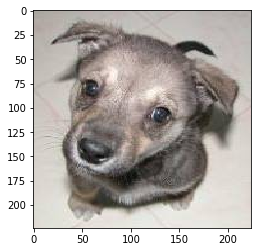

Predicted: [[0. 1.]]


In [35]:
image_path="test/88.jpg"
#image_path="train/dogs/dog.10.jpg"
img = load_img(image_path, target_size=(224,224))
x = image.img_to_array(img)

#img = np.random.rand(224,224,3)
#plt.imshow(img)
#plt.show()

print(x.shape)
plt.imshow(x/255.)
plt.show()
x = np.expand_dims(x, axis=0)
x = resnet50.preprocess_input(x)


features = model.predict(x)
print('Predicted:', features)

In [11]:
filenames = os.listdir("test")

#validate_size = len(filenames)/5
#validate_files = random.sample(filenames, validate_size)

predict_values = [] #[['id', 'label']]

for file in filenames:
    src = "test/"+file
    img = load_img(src, target_size=(224,224))
    x = image.img_to_array(img)

    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    identify = int(file.split('.')[0])
    #print(file, identify)
    if identify >= 1 and identify <= 10:
        print(identify," ",'Predicted:', features)

    value = features[0][1]
    #predict_values.append([1, 2.0])
    predict_values.append([identify, value])


2   Predicted: [[0. 1.]]
10   Predicted: [[0. 1.]]
1   Predicted: [[0. 1.]]
7   Predicted: [[0. 1.]]
8   Predicted: [[0. 1.]]
9   Predicted: [[0. 1.]]


KeyboardInterrupt: 

In [ ]:
a = sorted(predict_values, key=lambda a_entry: a_entry[0])       

with open("values.csv", "w") as vcsv:
    vcsv.write("id,label" + '\n')
    np.savetxt(vcsv, a, "%d,%f", delimiter=",")
